<p style="background-color:lightgreen;font-family:newtimeroman;font-size:200%;color:black;text-align:center;border-radius:40px 20px;"><b>SVM (Support Vector Machines) - Understanding Hyperparameters (Mouse Viral Dataset)</b></p>

# <font color='green'> <b>Importing Libraries</b><font color='black'>  

In [51]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.svm import SVC
from svm_margin_plot import plot_svm_boundary    # from a local py file
from sklearn.model_selection import GridSearchCV

plt.rcParams["figure.figsize"] = (8,6)
import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# <font color='green'> <b>Loading The Dataset</b><font color='black'>  

This dataset contains data from a study involving mice and their exposure to two different medications. The goal of the study is to observe the presence of a virus in relation to the amounts of two medications administered to the mice. The dataset consists of three columns:

1. **Med_1_mL**: The amount of Medication 1 administered to each mouse, measured in milliliters (mL).
2. **Med_2_mL**: The amount of Medication 2 administered to each mouse, measured in milliliters (mL).
3. **Virus Present**: A binary indicator representing the presence of the virus in the mouse, where 0 indicates absence and 1 indicates presence.

The dataset can be used to analyze the relationship between the amounts of the two medications and the presence of the virus, potentially leading to insights about the effectiveness of the medications in preventing or treating the viral infection.

In [19]:
df = pd.read_csv("mouse_viral_study.csv")
df.head()

,Med_1_mL,Med_2_mL,Virus Present
0,6.508,8.583,0
1,4.126,3.073,1
2,6.428,6.370,0
3,3.673,4.905,1
4,1.580,2.441,1


# <font color='green'> <b>Understanding Data & EDA</b><font color='black'>  

In [23]:
df.shape

(400, 3)

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Med_1_mL       400 non-null    float64
 1   Med_2_mL       400 non-null    float64
 2   Virus Present  400 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 9.5 KB


In [25]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Med_1_mL,400.000,5.448,2.319,1.000,3.249,5.394,7.630,10.000
Med_2_mL,400.000,5.617,2.337,1.000,3.431,5.638,7.783,10.000
Virus Present,400.000,0.500,0.501,0.000,0.000,0.500,1.000,1.000


In [29]:
df["Virus Present"].value_counts()

# balanced data

Virus Present
0    200
1    200
Name: count, dtype: int64

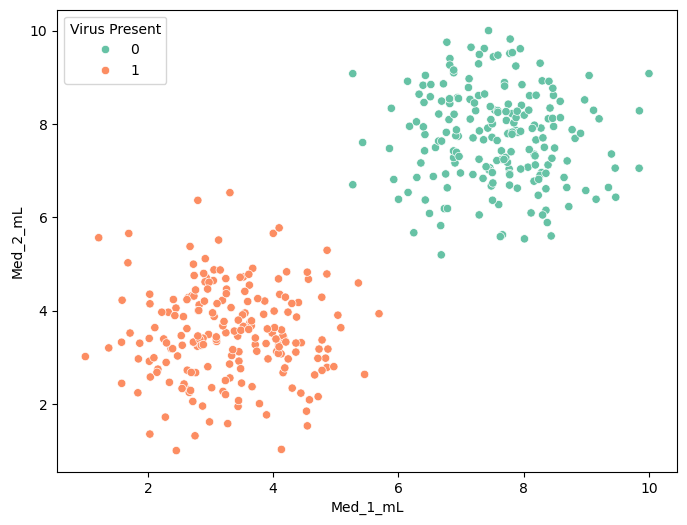

In [53]:
sns.scatterplot(x = "Med_1_mL", y = "Med_2_mL", hue = "Virus Present",data = df, palette = "Set2");

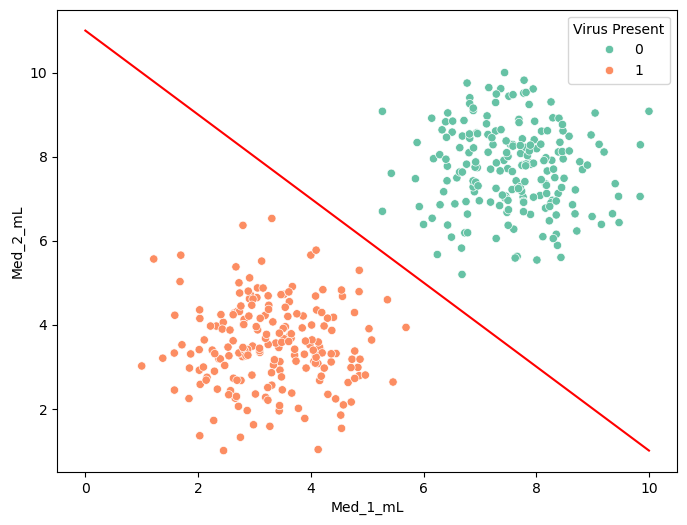

In [55]:
sns.scatterplot(x = "Med_1_mL", y = "Med_2_mL", hue = "Virus Present",data = df, palette = "Set2")

x = np.linspace(0, 10,100)

m = -1
b = 11
y = m*x + b

plt.plot(x, y, "red");

# <font color='green'> <b>Modeling</b><font color='black'>  

In [61]:
X = df.drop(columns="Virus Present")
y = df["Virus Present"]

In [63]:
model = SVC(kernel='linear', C= 1.0)
# default values: C=1.0, kernel='rbf', gamma= 'scale'

In [65]:
model.fit(X, y)

SVC(kernel='linear')

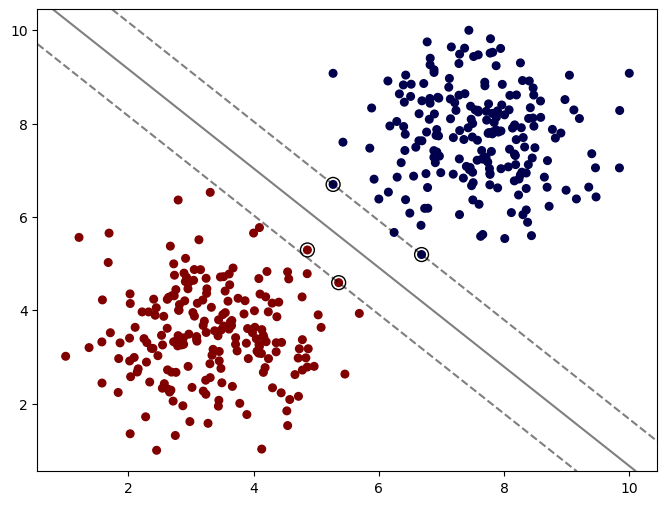

In [67]:
# Imported the plot_svm_boundary from our own py file named svm_margin_plot.
plot_svm_boundary(model, X, y)

# <font color='green'> <b>SVM HyperParameters</b><font color='black'>  

## <font color='blue'> <b>C</b><font color='black'>

**Parameter C in SVM plays a critical role in determining the performance and behavior of the model. It essentially strikes a balance between low training error and low testing error. This is key to the generalization ability of the model.**

**What is Parameter C?**

- **Regularization Parameter**: C parameter is a regularization parameter. It checks the balance between the simplicity of the decision boundary and misclassification of training examples.
- **Range**: C can take any positive value between 0 and infinity.
- **Inverse Proportion**: The strength of regularization is inversely proportional to C. Therefore, a small value of C means stronger regulariz

**How ​​Does C Affect the Model?**

1. **Small C Value**:
    - **High Regularization**: A small value of C applies a high level of regularization. This causes the model to favor a simpler decision boundary, even allowing some training points to be misclassified.
    - **Generalization**: This often results in better generalization over new, unseen data, reducing overfitting.
    - **Margin**: The margin becomes larger and less sensitive to individual data points.

2. **Big C Value**:
    - **Low Regularization**: A large C value means less regularization. The model attempts to classify all training examples correctly, resulting in a more complex decision boundary.
    - **Overfitting**: This can cause the model to perform very well on training data but perform poorly on new data.
    - **Margin**: The margin becomes smaller and more sensitive to individual data points, resulting in a more complex hyperplane.ation.

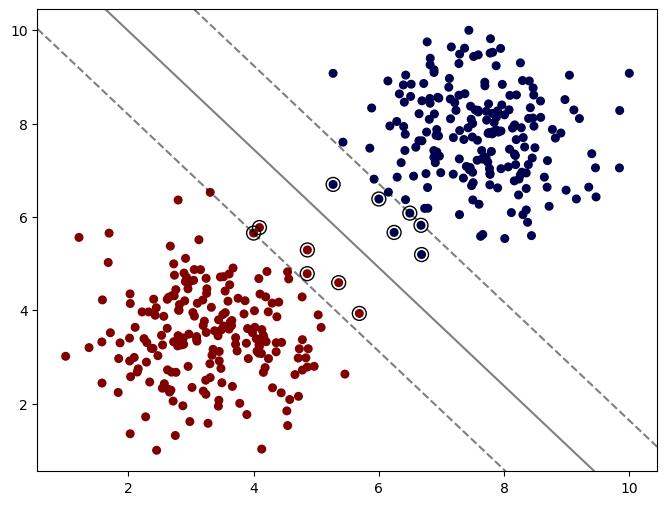

In [114]:
# for C=0.1
model = SVC(kernel='linear', C= 0.1)
model.fit(X, y)

plot_svm_boundary(model, X, y)

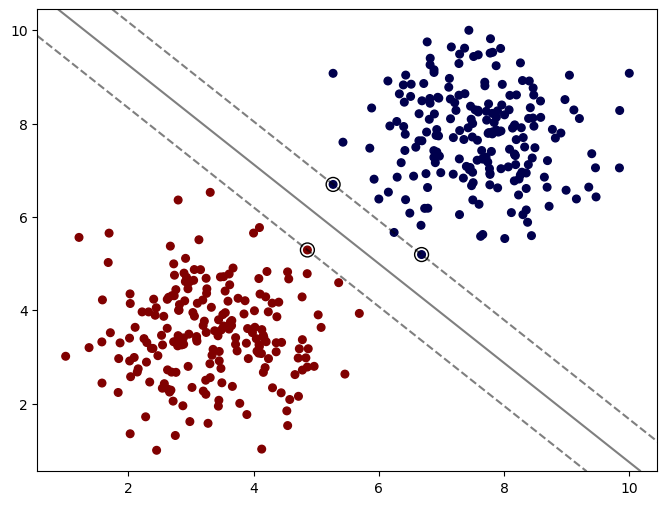

In [116]:
# for C=10
model = SVC(kernel='linear', C= 10)
model.fit(X, y)

plot_svm_boundary(model, X, y)

## <font color='blue'> <b>kernel</b><font color='black'>


Kernel Function is a method used to convert the data received as input into the format that needs to be processed. The name "Kernel" is used because the set of mathematical functions used in the Support Vector Machine (SVM) provides a window for manipulating data. Kernel Function makes it possible to linearly separate data that cannot be linearly separated in a low-dimensional space by transforming them into a higher-dimensional space. Essentially, it returns the dot product between two points at standard feature siz

**Kernel Selection**

**rbf - Radial Basis Function**:
- **Definition**: RBF kernel is the most commonly used kernel function in SVMs. By transforming data into an infinite-dimensional space, it allows modeling complex and non-linear relationships.
- **Parameters**:
  - **C**: As with all SVM kernels, the C parameter provides a balance between misclassification of training samples and simplicity of the decision surface. 
    - **Low C**: Makes the decision surface smooth and reduces the risk of overfitting.
    - **High C**: Aims at correct classification of training samples, but the risk of overfitting increases.
  - **Gamma**: Defines how effective a training example is.
    - **Low Gamma**: A wider domain, a smoother decision boundary.
    - **High Gamma**: A narrower impact area, sharper and circular decision boundaries.
- **Use Case**: RBF kernel is generally used on high-dimensional data containing non-linear relationships. It can increase the complexity and training time of the model, but it generally gives the be

**Linear (Linear Kernel)**:
- **Definition**: Linear kernel is used when data can be separated linearly.
- **Parameters**: The C parameter is also important in the linear kernel.
- **Use Case**: It is preferred in high-dimensional data or in cases where the data can be separated linearly. It requires less calculations and runs faster.

**Polynomial (Polynomial Kernel)**:
- **Definition**: Polynomial kernel transforms data polynomially.
- **Parameters**:
  - **Degree**: Determines the degree of the polynomial.
  - **C and Coef0**: Increases the flexibility of the decision surface.
- **Use Case**: Used in moderately non-linear relationships. As the degree increases, the complexity and training time of the model 

**Sigmoid (Logistic Regression Kernel)**:
- **Definition**: Sigmoid kernel is a function used in logistic regression model.
- **Parameters**:
  - **C and Coef0**: Determines the slope and elasticity of the function.
- **Use Case**: Used in special cases, generally less preferred than other kernel types.

**Precomputed Kernel**:
- **Definition**: Kernel matrix is ​​trained using pre-computed data.
- **Use Case**: It is preferred especially when large data sets and special kernel functions are used.

**Summary**

Kernel functions enable SVMs to adapt to different data sets, increasing their flexibility and generalization ability. Kernel selection should be made carefully depending on the nature of the data and the problem. Choosing the right kernel and hyperparameters significantly affects the performance and generalization ability of the model.increases.st results.e.

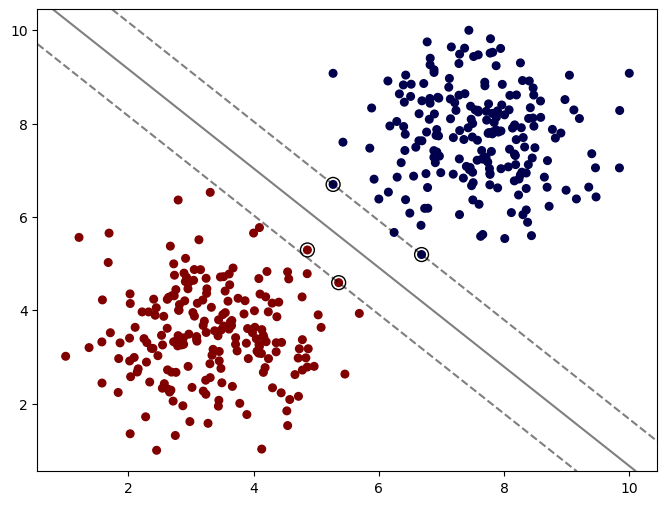

In [118]:
model = SVC(kernel= 'linear', C= 1.0, gamma= 0.1)
model.fit(X, y)

plot_svm_boundary(model, X, y)

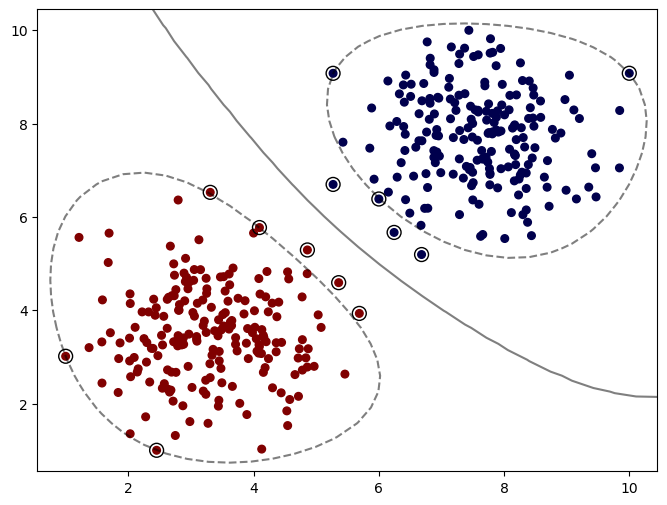

In [120]:
model = SVC(kernel= 'rbf', C= 1.0)
model.fit(X, y)

plot_svm_boundary(model, X, y)

## <font color='blue'> <b>gamma</b><font color='black'>

Gamma and C, the two key hyperparameters in SVM, significantly affect the performance of the model. Correctly setting these parameters can increase the generalization ability and accuracy of the model. Here is a detailed explanation of how these parameters interact:

**Gamma:**

- **Width of Margins**: Gamma determines the width of the margins in the SVM. A high Gamma value narrows the area around classes, a low Gamma value expands it.
- **Classification**: The aim is to ensure correct classification by including as many observations as possible in this field. Usually, this area is drawn slightly larger so that more data points can be included.
- **Effect**: As the gamma value increases, the model draws sharper and more complex decision boundaries, which may increase the risk of overfitting the model.

**C:**

- **Regularization**: C is the regularization parameter in SVM. Low values ​​of C make the model more simple and generalizing, while high values ​​cause the model to fit the training data more tightly.
- **Error Penalization**: C determines how much the model will penalize errors in the training data. Low C tolerates more errors, while high C tolerates fe

**Interaction of C and Gamma:**

- **Regularization and General Effect**: As C and Gamma values ​​decrease, the regularization coefficient increases, which makes the model more generalizing. High Gamma values ​​may cause the model to draw more complex and sharp decision boundaries.
- **Interaction**: As the gamma value increases, the effect of C decreases. A high Gamma defines a smaller area over a limited data set, which reduces the regularization effect of C.
- **Grid Search**: The **grid search** method is generally used to find the appropriate values ​​of the C and Gamma parameters. This method determines the pair of parameters that gives the best performance by trying different combinations of C and Ga

**Regularization with C and Gamma:**

1. **Low C and Low Gamma**:
   - **Regularization Coefficient**: High
   - **Model**: Simpler and generalist
   - **Overfitting Risk**: Low

2. **High C and High Gamma**:
   - **Regularization Coefficient**: Low
   - **Model**: More complex and tightly adapted to the data set
   - **Overfitting Risk**: High

3. **Low C and High Gamma**:
   - **Model**: More complex decision boundaries, but generally less regularization

4. **High C and Low Gamma**:
   - **Model**: Simpler decision bounds, but tight fit 
  
**Summary**

- **C and Gamma**: These are two critical parameters that determine the performance of the model in SVM.
- **Regularization**: Low C and Gamma values, high regularization and simpler model; Higher C and Gamma values ​​mean lower regularization and more complex models.
- **Interaction**: As the gamma value increases, the effect of C decreases. Understanding this interaction allows the model to be tuned correctly.
- **Grid Search**: Used to find the best combination of parameters.to training datamma.wer errors.

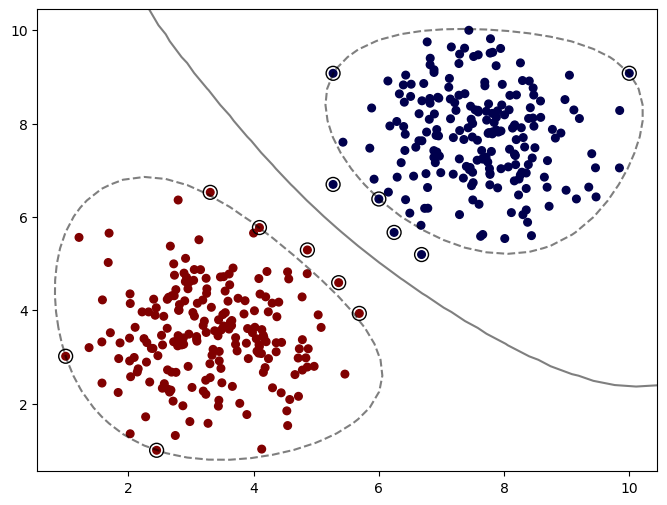

In [122]:
model = SVC(kernel= 'rbf', C= 1.0, gamma= 0.1)
model.fit(X, y)

plot_svm_boundary(model, X, y)

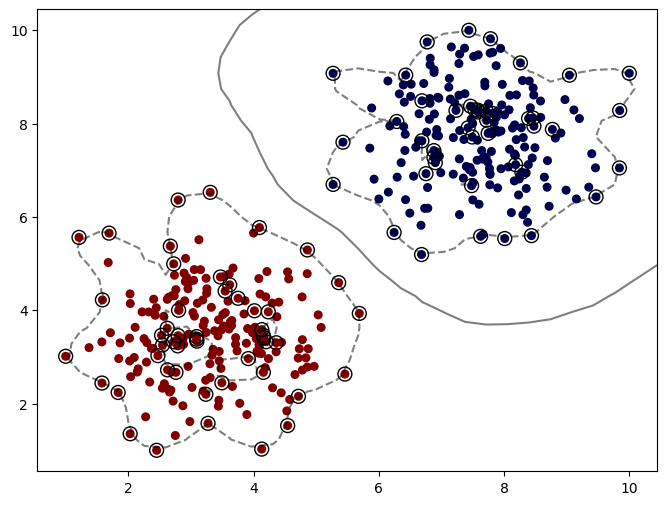

In [124]:
model = SVC(kernel= 'rbf', C= 1.0, gamma= 1.0)
model.fit(X, y)

plot_svm_boundary(model, X, y)

## <font color='blue'> <b>degree</b><font color='black'>

**Degree (Only For Polynomial Kernels)**

In SVM, the **Degree** parameter is only meaningful when using the **polynomial** (polynomial) kernel function. It is ignored by all other kernel types. This parameter determines the degree of the polynomial and directly affects the complexity of the decision boundary.

**What is Degree?**

- **Polynomial Kernel**: The polynomial kernel function uses polynomial terms to project data into a higher dimensional space. This makes nonlinear data more easily separable.
- **Degree**: Degree is the degree of the polynomial kernel. That is, it represents the upper degree of the polynomial. For example, if degree = 2, a quadratic polynomial i

**Effect of Degree on the Model**

1. **Low Degree (For example, 2 or 3)**:
    - **Decision Boundary**: Creates a less complex decision boundary.
    - **Model**: It becomes simpler and more general, and the risk of overfitting is reduced.
    - **Calculation**: Requires less calculations and runs faster.

2. **High Degree (For example, 5 or More)**:
    - **Decision Boundary**: Creates a more complex and inclined decision boundary.
    - **Model**: Fits the training data more tightly, which can increase the risk of overfitting.
    - **Calculation**: Requires more calculations and training time 
  
**Summary**

- **Degree**: It is the degree of the polynomial kernel function. It only makes sense when polynomial kernel is used.
- **Low Degree**: Simpler and generalist model, less calculations.
- **Higher Degree**: More complex and biased model, risk of overfitting, more calculations.
- **Grid Search**: Used to find the best combination of degree and other parameters.

Correctly setting the degree parameter can make a significant performance difference in SVM models using polynomial kernels. This parameter directly affects the complexity of the decision boundary and the generalization ability of the model.increases.s used.

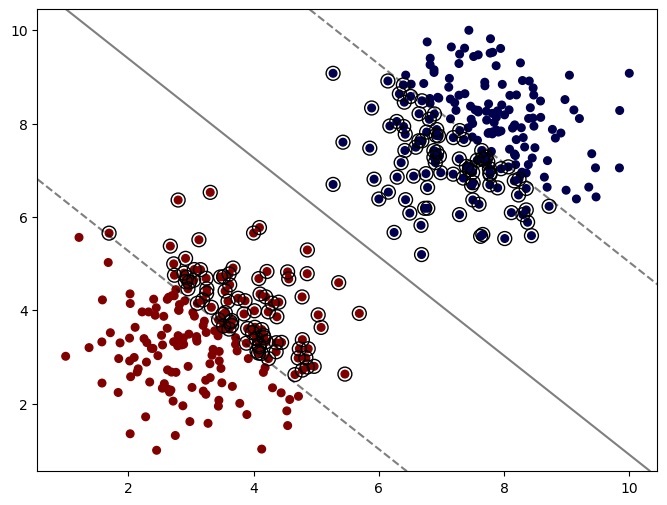

In [126]:
model = SVC(kernel="poly", C=0.01, degree= 1)
model.fit(X,y)

plot_svm_boundary(model, X, y)

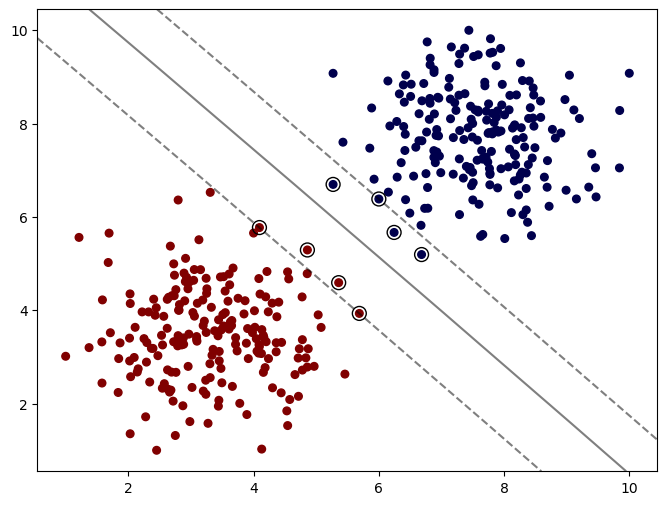

In [128]:
model = SVC(kernel="poly", C=0.01, degree= 3)
model.fit(X,y)

plot_svm_boundary(model, X, y)

# <font color='green'> <b>GridSearch</b><font color='black'>  

In [131]:
svm = SVC()

param_grid = {
    'C': [0.01, 0.1, 0.5, 1, 10, 1000],
    'kernel': ['linear', 'rbf', 'sigmoid', 'poly'],
    'gamma': ["scale", "auto", 0.1, 1],
    'degree': [1, 2, 3]
}

grid = GridSearchCV(svm, param_grid, n_jobs=-1)

grid.fit(X,y)

GridSearchCV(estimator=SVC(), n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 0.5, 1, 10, 1000],
                         'degree': [1, 2, 3],
                         'gamma': ['scale', 'auto', 0.1, 1],
                         'kernel': ['linear', 'rbf', 'sigmoid', 'poly']})

In [133]:
grid.best_params_

{'C': 0.01, 'degree': 1, 'gamma': 'scale', 'kernel': 'linear'}

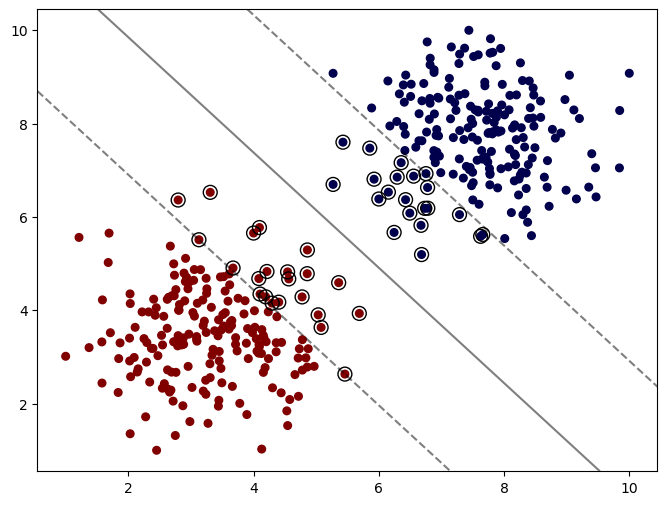

In [135]:
model = SVC(kernel="linear", C=0.01, degree= 1, gamma= 'scale')
model.fit(X,y)

plot_svm_boundary(model, X, y)

This notebook was created to **understand the hyperparameters of the SVM algorithm.** That's why there are no sections such as final model and prediction in this notebook.

**A complete project with SVM is in 5.2 - SVM_DiabetesDataset notebook.**

<p style="background-color:lightgreen;font-family:newtimeroman;font-size:200%;color:black;text-align:center;border-radius:40px 20px;"><b>THANK YOU!</b></p>